# Introduction

With the growing popularity of meal kit purchases in the United States, companies in the semi-prepared meal delivery industry are competing to meet the demands of consumers. Meal kits have become a popular choice for many people due to their convenience and the inclusion of new and healthy recipes, saving time on shopping, preparation, and cooking. According to Nielsen, 1 in 4 adults in the US have purchased a meal kit in the last year, and 70% of them continue to buy them after their first purchase. With more than half of Americans using diet to prevent ailments, meal kits are a simple option for those looking to manage their health and diets (Nielsen, 2017). 

Reference

Nielsen: Understanding the Mealkit Landscape and Customer Preferences. (n.d.). https://www.profitero.com/blog/2017/05/understanding-the-mealkit-landscape-and-customer-preferences


# Object

The aim of this is to forecast future revenue using a regression model based on existing data. In this analysis, a variety of factors will be examined that can impact revenue. By using a regression model, we can identify patterns and trends in the data and use them to make informed predictions about revenue in the future. The goal is to provide insights that can help businesses make data-driven decisions about their revenue strategies and improve their financial performance. So, let's dive in and explore how this regression model can help predict revenue.


# Step 1: Explore the data

Exploring the data is an essential step in any data analysis project, as it allows us to gain a rough image of the data and identify any patterns, trends, or outliers. By visualizing the data, we can see how the variables are distributed, detect potential relationships between them, and identify any data quality issues. This initial exploration provides valuable insights and can guide us in selecting appropriate analytical methods to use in our analysis. In addition, this exploratory phase can help us refine our research questions and hypotheses, ensuring that we are asking the right questions and answering them in the most effective way possible.


In [1]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.ensemble import GradientBoostingRegressor # gbm


In [2]:
# specifying file name
file = './Apprentice_Chef_Dataset_2023.xlsx'

# reading the file into Python
Apprentice_Chef = pd.read_excel(file)

# fixed the name erorr in the original dataset
Apprentice_Chef['LATE_DELIVERIES'] = Apprentice_Chef['LATE_DELIVERIES ']

# outputting the first ten rows of the dataset
Apprentice_Chef.head(10)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LATE_DELIVERIES
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16,0
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584,4
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095,0
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198,0
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664,0


In [3]:
# outputting the first ten rows of the dataset
Apprentice_Chef.tail(5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,LATE_DELIVERIES
1941,2940.000,Wat (Barleycorn),wat.(barleycorn)@live.com,Wat,NaN,89,6,13,3,143.0,1,5,2,8,0,53.0,5,2.894737,16,0
1942,7087.500,Hendry Bracken,hendry.bracken@exxon.com,Hendry,Bracken,155,7,13,9,169.4,0,6,2,0,8,39.0,5,2.631579,302,8
1943,6562.500,Aenys I Targaryen,aenys.i.targaryen@passport.com,Aenys,I Targaryen,65,9,13,6,187.4,1,5,1,0,9,48.0,6,2.631579,310,9
1944,5355.000,Leo Blackbar,leo.blackbar@pg.com,Leo,Blackbar,58,9,18,10,238.5,3,6,1,0,0,31.0,6,2.631579,275,0
1945,5194.875,Anguy,anguy@boeing.com,Anguy,Anguy,96,7,19,10,168.9,2,6,2,0,0,47.0,5,2.368421,5,0


In [4]:
# INFOrmation about each variable
Apprentice_Chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

### Observation

Upon initial exploration of the data, it was observed that a majority of the data are numerical in nature. The columns 'NAME', 'FIRST_NAME', and 'FAMILY_NAME' do not appear to be particularly useful for analysis. Out of these columns, only 'FAMILY_NAME' contains missing data. It may be beneficial to further investigate why this column has missing data and explore potential strategies for handling missing values.

In [5]:
# taking the housing dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
Apprentice_Chef.isnull().sum(axis = 0)

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
LATE_DELIVERIES                 0
dtype: int64

# Identify the data type of each original variable in the dataset.
Use the following groupings:

* CONTINUOUS
* INTERVAL/COUNT
* CATEGORICAL

# Develop a histogram to analyze the distribution of the Y-variable.

### Observation

Based on the graph, the Y-variable is left skewed, which means that the majority of the values are concentrated on the right-hand side of the distribution with a long tail stretching towards the left. This indicates that the data has a few very small values and a larger number of very large values.

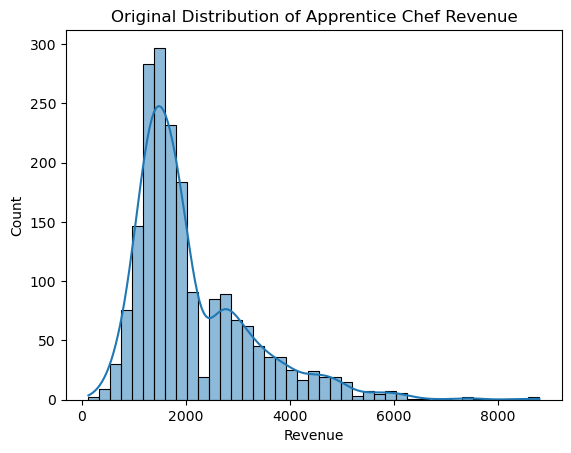

In [ ]:
# developing a histogram using HISTPLOT
sns.histplot(data   = Apprentice_Chef,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Apprentice Chef Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# Analyze how the each feature in the dataset correlate to REVENUE.

### Observation

This correlation table shows the correlation coefficients between the revenue and other variables in the dataset. The correlation coefficient is a statistical measure that represents the strength and direction of the linear relationship between two variables. The table shows that the revenue has a strong positive correlation with the "AVG_TIME_PER_SITE_VISIT" (0.64) and "TOTAL_MEALS_ORDERED" (0.60) variables, which indicates that as the values of these variables increase, the revenue also tends to increase. The "TOTAL_PHOTOS_VIEWED" (0.46) and "LARGEST_ORDER_SIZE" (0.44) variables also show a positive correlation with the revenue, although not as strong as the previous two variables. On the other hand, the "AVG_MEAN_RATING" (-0.55) variable shows a strong negative correlation with the revenue, which indicates that as the value of this variable increases, the revenue tends to decrease. The rest of the variables have weak correlations with the revenue, including some negative correlations like "LATE_DELIVERIES" (-0.02), which indicates that as the number of late deliveries increases, the revenue tends to decrease slightly. Understanding the correlation between the revenue and other variables is important for identifying the most important factors that affect the revenue and for making informed business decisions.

In [ ]:
# creating a list of numerical data (including REVENUE)
numerical_data = ['REVENUE',
                  'TOTAL_MEALS_ORDERED',
                  'AVG_TIME_PER_SITE_VISIT',
                  'TOTAL_MEALS_ORDERED',
                  'TOTAL_PHOTOS_VIEWED',
                  'UNIQUE_MEALS_PURCH',
                  'CONTACTS_W_CUSTOMER_SERVICE',
                  'PRODUCT_CATEGORIES_VIEWED',
                  'PC_LOGINS',
                  'MOBILE_LOGINS',
                  'WEEKLY_PLAN',
                  'LATE_DELIVERIES',
                  'LARGEST_ORDER_SIZE',
                  'AVG_MEAN_RATING']


# developing a correlation matrix based on continuous features
Apprentice_Chef_corr = Apprentice_Chef[numerical_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
Apprentice_Chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_TIME_PER_SITE_VISIT        0.64
TOTAL_MEALS_ORDERED            0.60
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.46
LARGEST_ORDER_SIZE             0.44
CONTACTS_W_CUSTOMER_SERVICE    0.17
UNIQUE_MEALS_PURCH             0.10
MOBILE_LOGINS                  0.07
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
WEEKLY_PLAN                    0.01
LATE_DELIVERIES               -0.02
AVG_MEAN_RATING               -0.55
Name: REVENUE, dtype: float64

In [ ]:
# count the AVG_MEAN_RATING value to understand the data
Apprentice_Chef[['AVG_MEAN_RATING']].value_counts(sort=False)

AVG_MEAN_RATING
1.315789             2
1.578947             2
1.842105             2
2.105263            27
2.368421            64
2.631579            92
2.894737           175
3.157895           267
3.421053           358
3.684211           312
3.947368           250
4.210526           169
4.473684           148
4.736842            64
5.000000            14
dtype: int64

### Observation: The abnormal data of AVG_MEAN_RATING

The abnormal data of AVG_MEAN_RATING shows a strong negative correlation with other variables. This is due to the nature of user feedback. Some users give feedback on almost every order, while others only give feedback when they want to complain. Therefore, those who have more orders tend to give less feedback and only do so when they have a negative experience. As a result, the average rating is skewed towards lower values, resulting in a strong negative correlation. This indicates that the more orders a customer has, the lower their average rating tends to be. While this correlation may suggest that the food quality or service deteriorates over time, it is important to recognize that it may be due to the nature of user feedback and should be interpreted with caution.

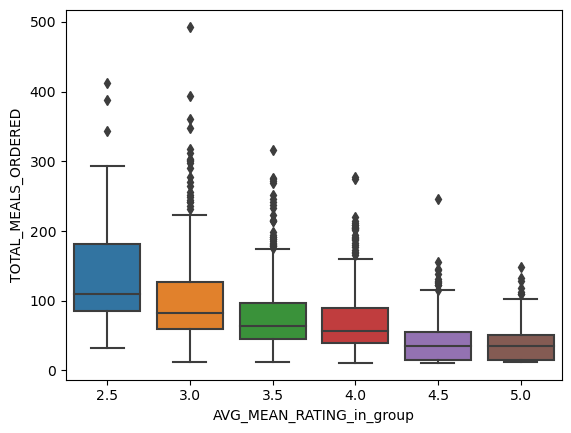

In [ ]:
# creat a new column for grouping AVG_MEAN_RATING
Apprentice_Chef['AVG_MEAN_RATING_in_group'] = Apprentice_Chef['AVG_MEAN_RATING']

# useing for loop to group AVG_MEAN_RATING data
# note that the grouped data does not repersent the actrual data
for index, value in enumerate(Apprentice_Chef['AVG_MEAN_RATING_in_group']):
    
    # if the value is lower than 2.5, then AVG_MEAN_RATING in group of 2.5
    if Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] < 2.5:
        Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] = 2.5
        
    # if the value is lower than 3, then AVG_MEAN_RATING in group of 3
    elif Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] < 3:
        Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] = 3
        
    # if the value is lower than 3.5, then AVG_MEAN_RATING in group of 3.5
    elif Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] < 3.5:
        Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] = 3.5
        
    # if the value is lower than 4, then AVG_MEAN_RATING in group of 4
    elif Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] < 4:
        Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] = 4
        
    # if the value is lower than 4.5, then AVG_MEAN_RATING in group of 4.5
    elif Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] < 4.5:
        Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] = 4.5
        
    # if the value is lower than 5.5, then AVG_MEAN_RATING in group of 5
    elif Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] < 5.5:
        Apprentice_Chef.loc[index, 'AVG_MEAN_RATING_in_group'] = 5
        
    # else, check for error
    else:
        print('Error: ', index, value)
        
# plot TOTAL_MEALS_ORDERED and AVG_MEAN_RATING_in_group to check the assumption
# The assumption is that people who have more order, tented to give less feedback and only wanting to complain.
sns.boxplot(x     = 'AVG_MEAN_RATING_in_group',
            y     = 'TOTAL_MEALS_ORDERED',
            data  = Apprentice_Chef)

# show the plot
plt.show()

# Plot the data

Plotting the data is an essential step to visualize the relationship between the independent variables and the dependent variable. By plotting the data, we can see the rough image of how each set of data looks like against revenue. This allows us to identify any potential outliers, trends, or patterns in the data that may help us determine which independent variables are most important for the regression model.

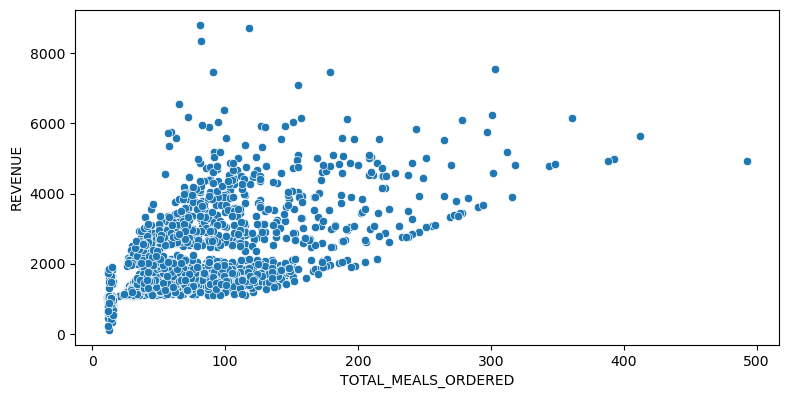

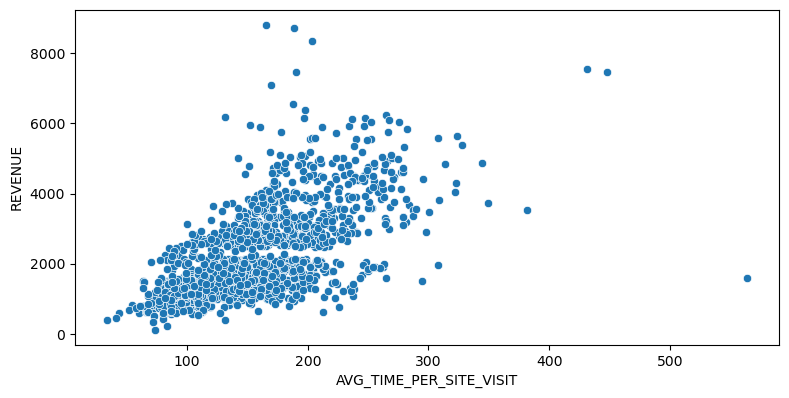

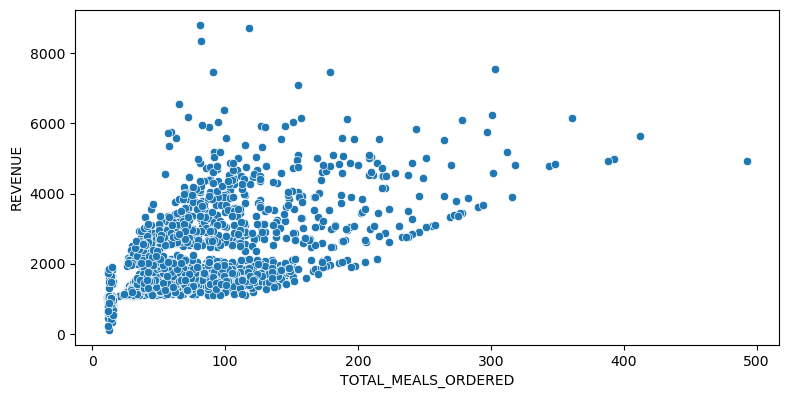

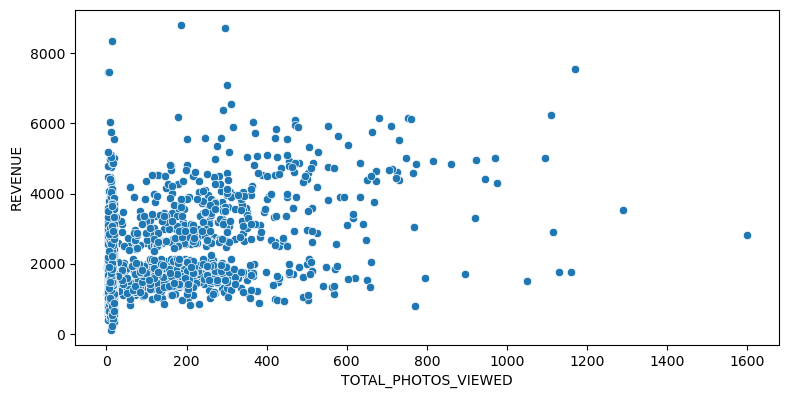

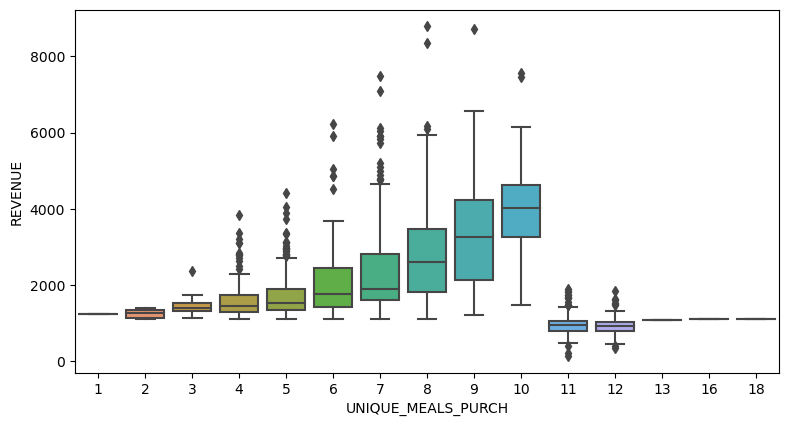

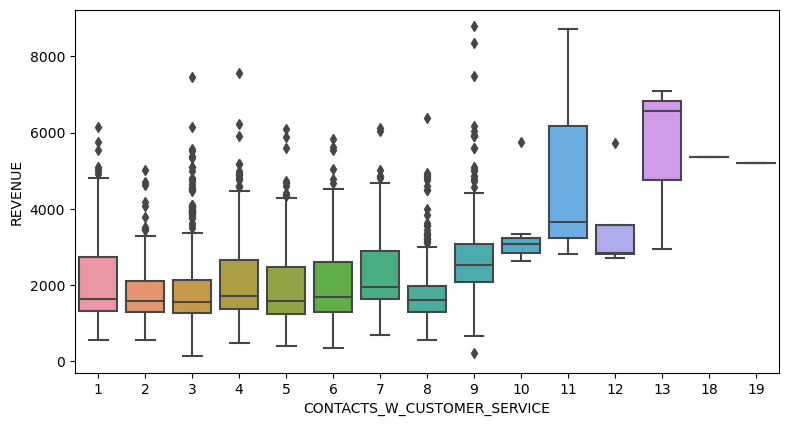

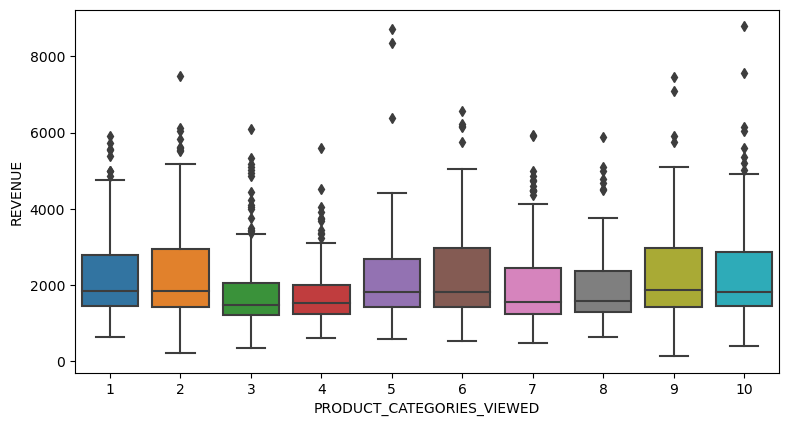

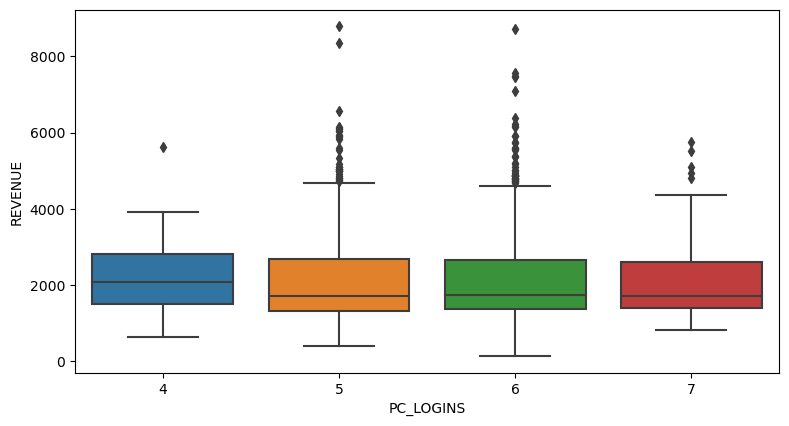

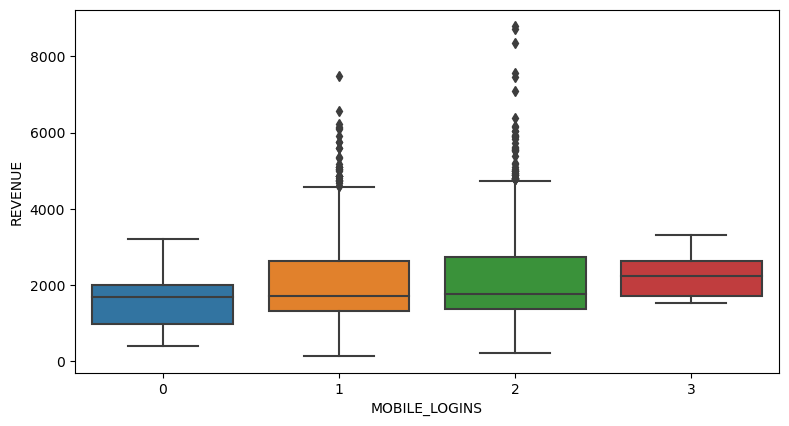

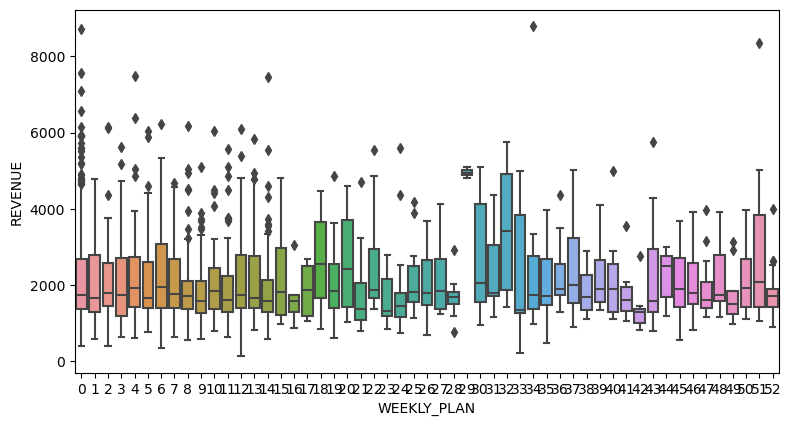

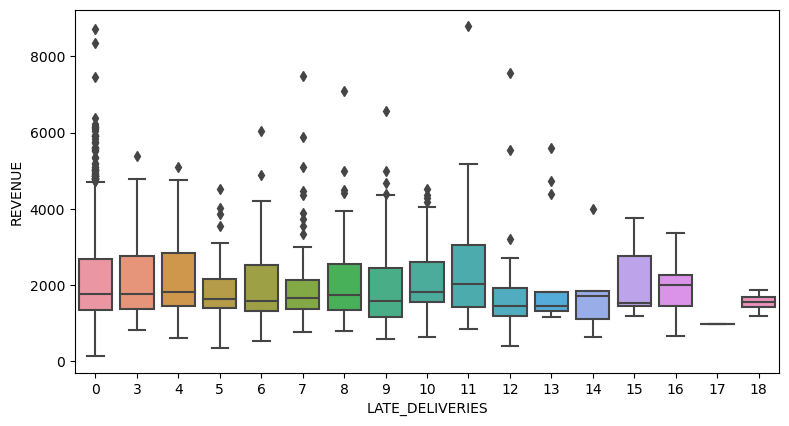

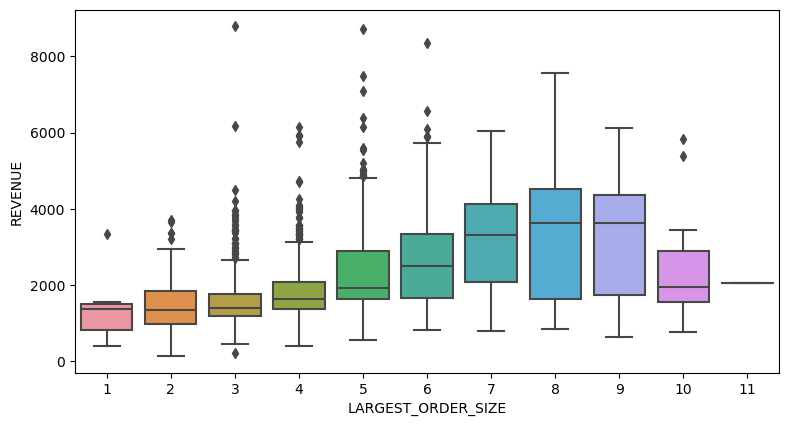

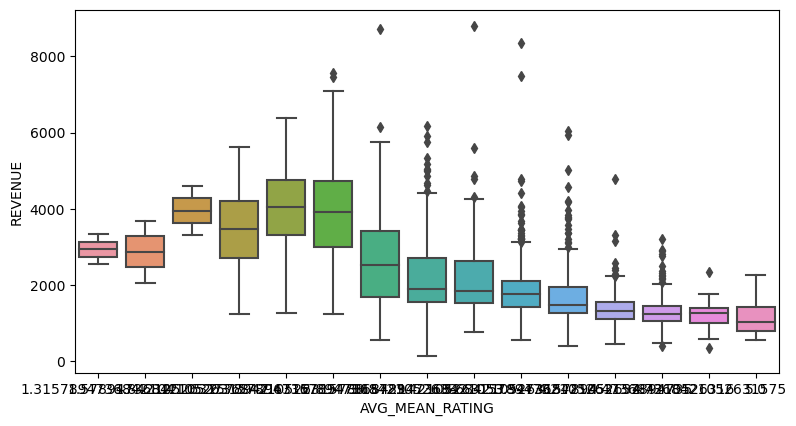

In [ ]:
# data1 is the continuous data
data1 = ['TOTAL_MEALS_ORDERED',
         'AVG_TIME_PER_SITE_VISIT',
         'TOTAL_MEALS_ORDERED',
         'TOTAL_PHOTOS_VIEWED']

# data2 is the interval/count data
data2 = ['UNIQUE_MEALS_PURCH',
         'CONTACTS_W_CUSTOMER_SERVICE',
         'PRODUCT_CATEGORIES_VIEWED',
         'PC_LOGINS',
         'MOBILE_LOGINS',
         'WEEKLY_PLAN',
         'LATE_DELIVERIES',
         'LARGEST_ORDER_SIZE',
         'AVG_MEAN_RATING']


# use for loop to plot the continuous data
for i in range(4):
    
    # setting figure size for each graph
    fig, ax = plt.subplots(figsize = (20, 20))
    
    # developing a scatterplot for the continuous data
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x = Apprentice_Chef[data1[i]],
                    y = Apprentice_Chef['REVENUE'])
    
    # display the graph
    plt.show()
    
    
# use for loop to plot the interval/count data
for i in range(9):
    
    # setting figure size for each graph
    fig, ax = plt.subplots(figsize = (20, 50))
    
    # developing a boxplot for the interval/count data
    plt.subplot(9, 2, i+1)
    sns.boxplot(x = Apprentice_Chef[data2[i]],
                y = Apprentice_Chef['REVENUE'])
    
    # display the graph
    plt.show()


# Step 2: Feature engineering 

Feature engineering is a crucial step in preparing data for a regression model. It involves refining the data by selecting and transforming variables to improve the accuracy and performance of the model. This step can include creating new variables based on existing ones, identifying and removing outliers, and addressing missing values. For example, in the case of predicting revenue, a useful variable to create might be the total number of meals ordered, as this could be a strong predictor of revenue. Another variable that could be created is the ratio of unique meals purchased to total meals, as this may indicate customer loyalty. Additionally, outliers in the data can be identified and either removed or transformed to better fit the distribution of the data. This step is critical to improving the accuracy and performance of the regression model, as it can ensure that the model is based on the most relevant and reliable data possible.

# Sort email domain

### The assumption

Although professional and personal email addresses may provide some indication of a customer's income level and working status, it is important to note that this information is limited and assumptions should be made with caution. Additionally, email addresses do not provide any information about a customer's family size or dietary preferences, which could also greatly impact their decision to order meal kits. However, if the company's goal is to provide meal kits for the working class, targeting customers with professional or personal email addresses may be a good starting point. It is also important to consider other factors such as marketing efforts and pricing strategies to ensure the product is accessible to the target demographic.

In [ ]:
# set variable for each domain
domain_professional = ['mmm.com',             'amex.com', 
                       'apple.com',           'boeing.com', 
                       'caterpillar.com',     'chevron.com', 
                       'cisco.com',           'cocacola.com', 
                       'disney.com',          'dupont.com', 
                       'exxon.com',           'ge.org', 
                       'goldmansacs.com',     'homedepot.com', 
                       'ibm.com',             'intel.com', 
                       'jnj.com',             'jpmorgan.com', 
                       'mcdonalds.com',       'merck.com', 
                       'microsoft.com',       'nike.com', 
                       'pfizer.com',          'pg.com', 
                       'travelers.com',       'unitedtech.com', 
                       'unitedhealth.com',    'verizon.com', 
                       'visa.com',            'walmart.com']

domain_personal = ['gmail.com', 
                   'yahoo.com', 
                   'protonmail.com']

domain_junk = ['me.com', 
               'aol.com', 
               'hotmail.com', 
               'live.com', 
               'msn.com', 
               'passport.com']


# set the new feature foe each domain
Apprentice_Chef['domain_professional'] = 0
Apprentice_Chef['domain_personal'] = 0
Apprentice_Chef['domain_junk'] = 0


# use for loop to sort for each domain
for index, email in enumerate(Apprentice_Chef.loc[:, 'EMAIL']):
    
    # if the email domain in domain_professional
    if email.split('@')[1] in domain_professional:        
        
        # then new feature domain_professional equal to 1
        Apprentice_Chef.loc[index, 'domain_professional'] = 1
        
    # if the email domain in domain_personal
    elif email.split('@')[1] in domain_personal:
        
        # then new feature domain_personal equal to 1
        Apprentice_Chef.loc[index, 'domain_personal'] = 1
        
    # if the email domain in domain_junk
    elif email.split('@')[1] in domain_junk:
        
        # then new feature domain_junk equal to 1
        Apprentice_Chef.loc[index, 'domain_junk'] = 1
        
    # check for error
    else:
        print('Unknown: ', index, email)
        

# Transform the continuous data

In [ ]:
# turning all the continuous data to log form
Apprentice_Chef['log_REVENUE']                 = np.log(Apprentice_Chef['REVENUE'])
Apprentice_Chef['log_TOTAL_MEALS_ORDERED']     = np.log(Apprentice_Chef['TOTAL_MEALS_ORDERED'])
Apprentice_Chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log(Apprentice_Chef['AVG_TIME_PER_SITE_VISIT'])
Apprentice_Chef['log_AVG_PREP_VID_TIME']       = np.log(Apprentice_Chef['AVG_PREP_VID_TIME'])
Apprentice_Chef['log_TOTAL_PHOTOS_VIEWED']     = np.log(Apprentice_Chef['TOTAL_PHOTOS_VIEWED'])


### Observation

The table provided shows the correlation coefficients between different variables in the dataset, and their respective log-transformed versions. As we can see, log-transformed variables tend to have higher correlation coefficients with revenue than their non-transformed counterparts. However, there are some exceptions to this trend. In the case of the variable TOTAL_PHOTOS_VIEWED, the correlation coefficient is higher when the variable is not log-transformed. This may be because the relationship between the number of photos viewed and revenue is not linear, or because the variable has a limited range of values that do not benefit from a log transformation. On the other hand, log_AVG_PREP_VID_TIME has similar correlation coefficients with revenue, whether or not revenue is in log form. This suggests that the relationship between these two variables is more linear than for other variables. Overall, the choice of whether or not to use log-transformed data will depend on the specific characteristics of each variable and its relationship with revenue.

In [ ]:
# set up the data to compare
continuous_data1 = ['REVENUE',
                    'log_REVENUE',
                    'TOTAL_MEALS_ORDERED',
                    'AVG_TIME_PER_SITE_VISIT',
                    'AVG_PREP_VID_TIME',
                    'TOTAL_PHOTOS_VIEWED',
                    'log_TOTAL_MEALS_ORDERED',
                    'log_AVG_TIME_PER_SITE_VISIT',
                    'log_AVG_PREP_VID_TIME',
                    'log_TOTAL_PHOTOS_VIEWED']


# check for the correlation
# creating a (Pearson) correlation matrix
Apprentice_Chef_corr = Apprentice_Chef[continuous_data1].corr(method = 'pearson')

# printing (Pearson) correlations with REVENUE
Apprentice_Chef_corr.loc[ : , ['REVENUE', 'log_REVENUE']].round(decimals = 2).sort_values(by='REVENUE', ascending = False)


,REVENUE,log_REVENUE
REVENUE,1.00,0.95
log_REVENUE,0.95,1.00
AVG_TIME_PER_SITE_VISIT,0.64,0.65
log_AVG_TIME_PER_SITE_VISIT,0.63,0.67
log_TOTAL_MEALS_ORDERED,0.61,0.69
TOTAL_MEALS_ORDERED,0.60,0.61
TOTAL_PHOTOS_VIEWED,0.46,0.43
log_TOTAL_PHOTOS_VIEWED,0.42,0.42
log_AVG_PREP_VID_TIME,0.15,0.15
AVG_PREP_VID_TIME,0.14,0.14


In [ ]:
# set up the data to compare
all_data = ['REVENUE',
            'log_REVENUE',
            'log_TOTAL_MEALS_ORDERED',
            'log_AVG_TIME_PER_SITE_VISIT',
            'log_AVG_PREP_VID_TIME',
            'TOTAL_PHOTOS_VIEWED',
            'domain_professional',
            'domain_personal',
            'domain_junk',
            'LARGEST_ORDER_SIZE',
            'CONTACTS_W_CUSTOMER_SERVICE',
            'UNIQUE_MEALS_PURCH',
            'MOBILE_LOGINS',
            'PRODUCT_CATEGORIES_VIEWED',
            'PC_LOGINS',
            'WEEKLY_PLAN',
            'LATE_DELIVERIES',
            'AVG_MEAN_RATING']


# check for the correlation
# creating a (Pearson) correlation matrix
Apprentice_Chef_corr = Apprentice_Chef[all_data].corr(method = 'pearson')

# printing (Pearson) correlations with REVENUE
Apprentice_Chef_corr.loc[ : , ['REVENUE', 'log_REVENUE']].round(decimals = 2).sort_values(by='REVENUE', ascending = False)


,REVENUE,log_REVENUE
REVENUE,1.00,0.95
log_REVENUE,0.95,1.00
log_AVG_TIME_PER_SITE_VISIT,0.63,0.67
log_TOTAL_MEALS_ORDERED,0.61,0.69
TOTAL_PHOTOS_VIEWED,0.46,0.43
LARGEST_ORDER_SIZE,0.44,0.45
CONTACTS_W_CUSTOMER_SERVICE,0.17,0.18
log_AVG_PREP_VID_TIME,0.15,0.15
UNIQUE_MEALS_PURCH,0.10,-0.04
MOBILE_LOGINS,0.07,0.08


### Observation

Taking the log form of the REVENUE variable is generally better in statistical analysis as it helps to normalize the data and reduce the effects of extreme values. The log transformation compresses the values of the data and brings the outliers closer to the mean, reducing the impact of extreme values on the analysis. The normality assumption of the linear regression model is improved, as it reduces heteroscedasticity and produces a more symmetrical distribution of the residuals. Additionally, the interpretation of the coefficients in the regression model becomes more meaningful when using log-transformed data. This is because a unit change in the log-transformed variable corresponds to a percentage change in the original variable, which can be more intuitive and informative for certain types of analysis.

In [ ]:
# removing irrelevant correlations
Apprentice_Chef_corr = Apprentice_Chef_corr.iloc[ 2: , :]


# placeholder column for y-variable recommendation
Apprentice_Chef_corr['recommended'] = 0


# filling in placeholder
for index, column in Apprentice_Chef_corr.iterrows():
    
    # if REVENUE is higher
    if abs(Apprentice_Chef_corr.loc[ index, 'REVENUE']) >  abs(Apprentice_Chef_corr.loc[ index, 'log_REVENUE']):
        Apprentice_Chef_corr.loc[ index , 'recommended'] = 'REVENUE'
        
        
    # if log_REVENUE is higher 
    elif abs(Apprentice_Chef_corr.loc[ index, 'REVENUE']) <  abs(Apprentice_Chef_corr.loc[ index, 'log_REVENUE']):
        Apprentice_Chef_corr.loc[ index , 'recommended'] = 'log_REVENUE'
    
    
    # in case they are tied
    else:
        Apprentice_Chef_corr.loc[ index , 'recommended'] = 'Tie'
        

# checking results
Apprentice_Chef_corr[["recommended"]].value_counts(normalize = True,
                                       sort      = True,
                                       ascending = False).round(decimals = 2)

recommended
log_REVENUE    0.69
REVENUE        0.31
dtype: float64

# Step 3: Regression model

### Observation

In statistical hypothesis testing, the p-value is the probability of obtaining a test statistic at least as extreme as the one that was actually observed, assuming that the null hypothesis is true. A p-value less than 0.05 is often considered as statistically significant, suggesting that the observed effect is unlikely to be due to chance alone. Conversely, a p-value higher than 0.05 means that the observed effect could reasonably be attributed to chance, and therefore the null hypothesis cannot be rejected. In the case of the variables MOBILE_LOGINS, PRODUCT_CATEGORIES_VIEWED, PC_LOGINS, WEEKLY_PLAN, LATE_DELIVERIES, their p-values are higher than 0.05, indicating that there is insufficient evidence to reject the null hypothesis. This means that these variables are not statistically significant predictors of REVENUE and can be excluded from the regression model without affecting the model's performance.

In [ ]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """log_REVENUE ~ log_TOTAL_MEALS_ORDERED +
                                             log_AVG_TIME_PER_SITE_VISIT + 
                                             log_AVG_PREP_VID_TIME +
                                             TOTAL_PHOTOS_VIEWED +
                                             domain_professional + 
                                             domain_personal + 
                                             domain_junk + 
                                             LARGEST_ORDER_SIZE +
                                             CONTACTS_W_CUSTOMER_SERVICE +
                                             UNIQUE_MEALS_PURCH +
                                             MOBILE_LOGINS +
                                             PRODUCT_CATEGORIES_VIEWED +
                                             PC_LOGINS +
                                             WEEKLY_PLAN +
                                             LATE_DELIVERIES +
                                             AVG_MEAN_RATING""", data = Apprentice_Chef)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     289.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:21:22   Log-Likelihood:                -216.97
No. Observations:                1946   AIC:                             465.9
Df Residuals:                    1930   BIC:                             555.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Keep the significant data

In [ ]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """log_REVENUE ~ log_TOTAL_MEALS_ORDERED +
                                             log_AVG_TIME_PER_SITE_VISIT + 
                                             log_AVG_PREP_VID_TIME +
                                             TOTAL_PHOTOS_VIEWED +
                                             domain_professional + 
                                             domain_personal + 
                                             domain_junk + 
                                             LARGEST_ORDER_SIZE +
                                             CONTACTS_W_CUSTOMER_SERVICE +
                                             UNIQUE_MEALS_PURCH +
                                             AVG_MEAN_RATING""", data = Apprentice_Chef)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     433.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:21:22   Log-Likelihood:                -220.10
No. Observations:                1946   AIC:                             462.2
Df Residuals:                    1935   BIC:                             523.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Final Result

The testing score of 0.8085 suggests that the Unpruned GBM model performs well on the test dataset, but there is a gap of 0.024 between the training score and testing score, indicating that the model may have overfit to the training data. Therefore, it may be beneficial to apply some form of regularization or pruning techniques to the model to improve its generalization performance on unseen data.

In [23]:
# declaring sets of x-variables (significant_data)
significant_data = ['log_TOTAL_MEALS_ORDERED',
                    'log_AVG_TIME_PER_SITE_VISIT',
                    'log_AVG_PREP_VID_TIME',
                    'TOTAL_PHOTOS_VIEWED',
                    'domain_professional',
                    'domain_personal',
                    'domain_junk',
                    'LARGEST_ORDER_SIZE',
                    'CONTACTS_W_CUSTOMER_SERVICE',
                    'UNIQUE_MEALS_PURCH',
                    'AVG_MEAN_RATING']


# Preparing a DataFrame based the the analysis above
x_data = Apprentice_Chef.loc[ : , significant_data]


# preparing response variable
log_y_data  = Apprentice_Chef.loc[ : , 'log_REVENUE']


#################################
## setting up train-test split ##
#################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            log_y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)


# specifying a model name
model_name = 'Unpruned GBM'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'huber'         ,
                                  learning_rate = 0.1             ,
                                  n_estimators  = 85              ,
                                  criterion     = 'friedman_mse'  ,
                                  max_depth     = 2               ,
                                  warm_start    = False           ,
                                  random_state  = 219             )


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Model name:', model_name)
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)
print('This is the final model.')

Model name: Unpruned GBM
Training Score : 0.8325
Testing Score  : 0.8085
Train-Test Gap : 0.024
This is the final model.


In [ ]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'squared_er

In [ ]:
from sklearn.tree import DecisionTreeRegressor       # regression trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning

# declaring a hyperparameter space
loss_range         = ['huber']
n_estimators_range = range(1, 150, 2)
depth_range        = range(2, 3)


# creating a hyperparameter grid
param_grid = {'loss' : loss_range,
              'n_estimators'  : n_estimators_range,
              'max_depth' : depth_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = GradientBoostingRegressor(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 50,
                                   random_state          = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, log_y_data)


# printing the optimal parameters and best score
print("Tuned Parameters       :", tuned_tree_cv.best_params_)
print("Tuned Training R_Square:", tuned_tree_cv.best_score_.round(4))

KeyboardInterrupt: 